In [81]:
import numpy as np
import matplotlib.pyplot as plt
# from math import factorial as fact
from math import comb
import math
plt.style.use('seaborn-whitegrid')

This notebook was made for the purpose of graphing certain types of curves related to attribute acceptance sampling. Reference: Montgomery.

# 1. Functions

## 1.1 Type B OC Curve (Binomial)

In [4]:
def binom(n, r, p):
    # n: number of trials
    # r: number of successes
    # p: probability of success 
    
    combination = comb(n,r)
    proba = (p**r)*((1-p)**(n-r))
    return combination*proba
    

def oc_curve_b(n, c, x):
    # n is the sample size
    # c is the maximum number of defects allowed for the lot to be accepted (if d > c, then reject lot)
    
    zero_to_c = [i for i in range(int(c)+1)]
    
    y = [[binom(n, i, p) for i in zero_to_c] for p in x]
    y = [sum(value) for value in y]
    
    return y

## 1.2 Type A OC Curve (Hypergeometric)

In [42]:
def hyperg(N, n, r, x):
    # N: lot size
    # n: sample size
    # r: number of successes (defects) in N
    # x: random variable for which we want the probability (x successes in n)
    
    assert (x<=n)&(n<N) # x has to be smaller than or equal to sample size, sample size has to be smaller than lot size.
    
    num = comb(r,x)*comb(N-r,n-x)
    denom = comb(N,n)
    
    return num/denom
    
def oc_curve_a(N, n, c, x):
    # n is the sample size
    # c is the maximum number of defects allowed for the lot to be accepted (if d > c, then reject lot)
    
    zero_to_c = [i for i in range(int(c)+1)]
    
    y = [[hyperg(N, n, math.floor(p*N), i) for i in zero_to_c] for p in x]
    y = [sum(value) for value in y]
    
    return y  

## 1.3 AOQ Curve (Average Outgoing Quality)

Expected number of defects per lot (in item units):
### $ P_{a}p(N-n) $
Expected percentage of defects per lot (in %):
### $ AOQ = \frac{P_{a}p(N-n)}{N}$

Since the equations above take into account N, it assumes a hypergeometric distribution. For binomial distribution (type B OC curve), AOQ can be simplified into the following since N is very large.

### $ AOQ = P_{a}p$

In [43]:
def aoq_curve_b(n, c, p):
    # p: fraction nonconforming (horizontal axis)
    # Pa: probability of acceptance at p, given an oc_curve

    Pa = oc_curve_b(n, c, p) 
    return (Pa*p)

def aoq_curve_a(N, n, c, p):
    # p: fraction nonconforming (horizontal axis)
    # Pa: probability of acceptance at p, given an oc_curve

    Pa = oc_curve_a(N, n, c, p) 
    return (Pa*p*(N-n))/N

## 1.4 ATI (Average Total Inspection)

### $ATI = n + (1-P_{a})(N-n)$

In [7]:
def ati_curve(N, n, c, p):
    Pa = np.array(oc_curve_b(n, c, p))
    return n+(1-Pa)*(N-n)

# 2. Plot Space

In [125]:
# INPUT YOUR SAMPLING PLAN HERE.
N = 2000 # lot size
n = 50 # sample size
c = 1 # the maximum number of defects allowed for the lot to be accepted (if n_defects > c, then reject lot)
xlim = 0.1 # x axis fraction of defective in lot (unit: probability)

## 2.1 OC Curve

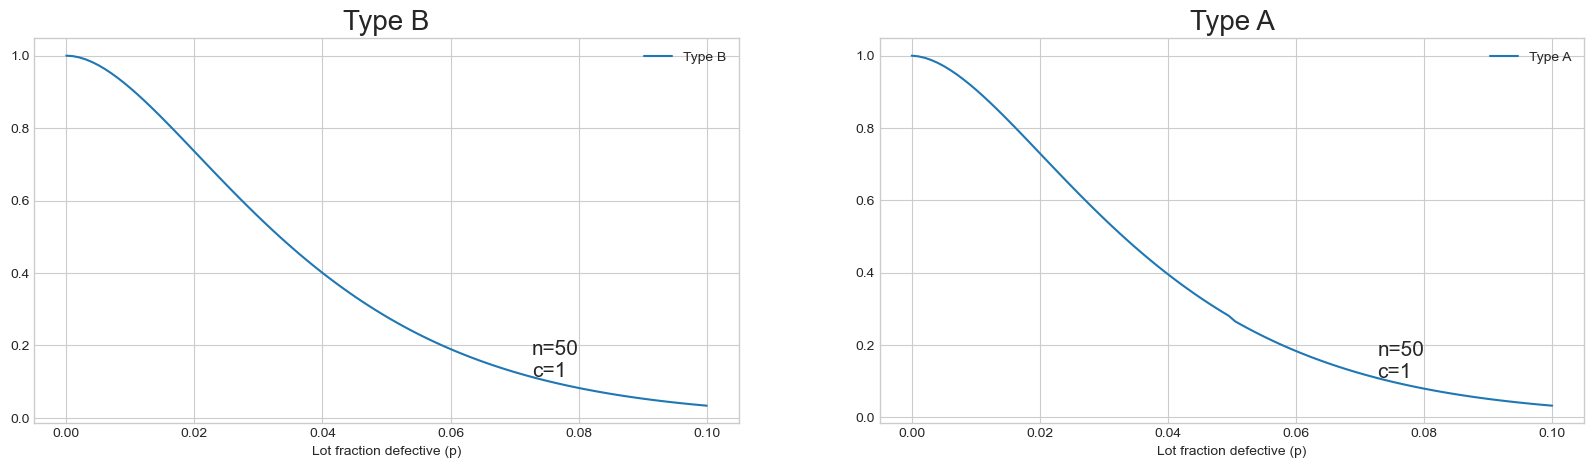

In [132]:
# Set up
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
x = np.linspace(0, xlim, 100) # fraction nonconforming

# OC curve TYPE B plot 
y_b = oc_curve_b(n, c, x)
ax1.plot(x, y_b, label = 'Type B')
ax1.set_xlabel('Lot fraction defective (p)')
ax1.set_title('Type B', fontsize=20)
ax1.legend()

# OC curve TYPE A plot 
y_a = oc_curve_a(N, n, c, x)
ax2.plot(x, y_a, label = 'Type A')
ax2.set_xlabel('Lot fraction defective (p)')
ax2.set_title('Type A', fontsize=20)
ax2.legend()

# Annotate both axes
rand_ix = np.random.randint(1/4*len(x), 3/4*len(x))
ax1.annotate(f'n={n}\nc={c}', (x[rand_ix],y_b[rand_ix]), fontsize=15)
ax2.annotate(f'n={n}\nc={c}', (x[rand_ix],y_a[rand_ix]), fontsize=15)


plt.show()

## 2.2 AOQ Curve

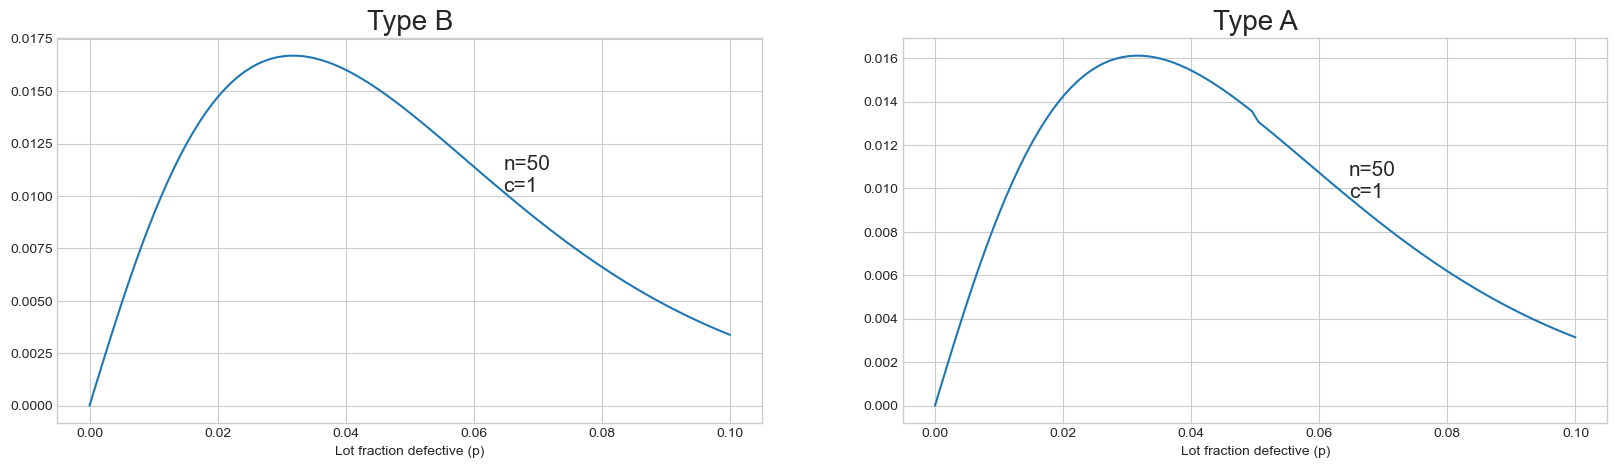

In [106]:
# Set up
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
x = np.linspace(0, xlim, 100) # fraction nonconforming

# AOQ Type B (without N)
y_b = aoq_curve_b(n, c, x)
ax1.plot(x,y_b)
ax1.set_xlabel('Lot fraction defective (p)')
ax1.set_title('Type B', fontsize=20)


# AOQ Type A (with N)
y_a = aoq_curve_a(N, n, c, x)
ax2.plot(x,y_a)
ax2.set_xlabel('Lot fraction defective (p)')
ax2.set_title('Type A', fontsize=20)

# Annotate both axes
rand_ix = np.random.randint(int(1/2*len(x)), 1*len(x))
ax1.annotate(f'n={n}\nc={c}', (x[rand_ix],y_b[rand_ix]), fontsize=15)
ax2.annotate(f'n={n}\nc={c}', (x[rand_ix],y_a[rand_ix]), fontsize=15)

plt.show()

## 2.3 ATI Curve

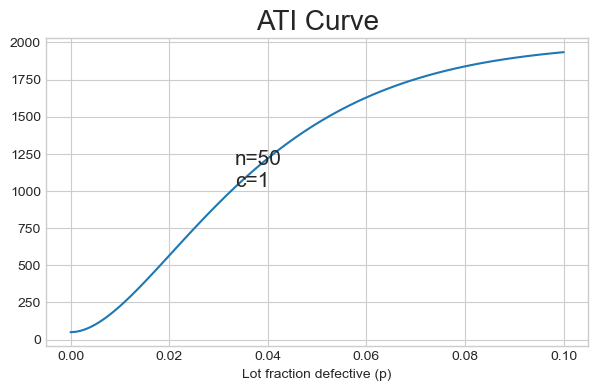

In [121]:
# Set up
f, ax = plt.subplots(figsize=(7,4))
x = np.linspace(0, xlim, 100) # fraction nonconforming

# Plot
y = ati_curve(N, n, c, x)
ax.plot(x,y)
ax.set_xlabel('Lot fraction defective (p)')
ax.set_title('ATI Curve', fontsize=20)

# Annotate axis
rand_ix = np.random.randint(0, 1/2*len(x))
ax.annotate(f'n={n}\nc={c}', (x[rand_ix],y[rand_ix]), fontsize=15)

plt.show()